# K-means

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Generate data

In [29]:
def loadCsv():
    return np.genfromtxt('data.csv', delimiter=',')


In [30]:
points = loadCsv()

### Main functions

In [31]:
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


In [32]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [33]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [34]:
def main(points):
    num_iterations = 100
    k = 3
        
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    
    # Run iterative process
    for i in range(num_iterations):
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)
    
    return centroids

In [49]:
centroids = main(points)

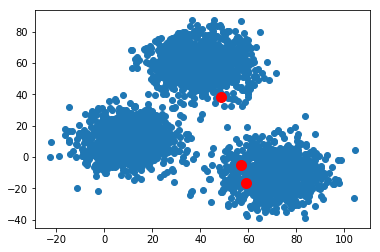

In [52]:
centroids = initialize_centroids(points, 3)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()

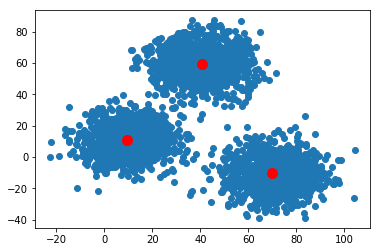

In [58]:
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()